In [6]:
from google.colab import files
uploaded = files.upload()  # Asegúrate de no interrumpir este proceso


Saving ferreteria_dataset_large.csv to ferreteria_dataset_large (1).csv


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
df = pd.read_csv('ferreteria_dataset_large.csv')
df.head()


,ID_Cliente,Edad,Genero,Producto,Precio,Cantidad,Dias_Desde_Ultima_Compra,Total_Compras,Descuento_Aplicado,Compra_Futura
0,1,58,F,Martillo,101.85,1,115,48,1,1
1,2,20,F,Alicates,174.07,1,142,20,0,1
2,3,45,M,Destornillador,121.86,4,200,39,1,1
3,4,27,F,Alicates,81.31,7,179,2,0,0
4,5,52,F,Destornillador,64.30,1,201,1,1,0


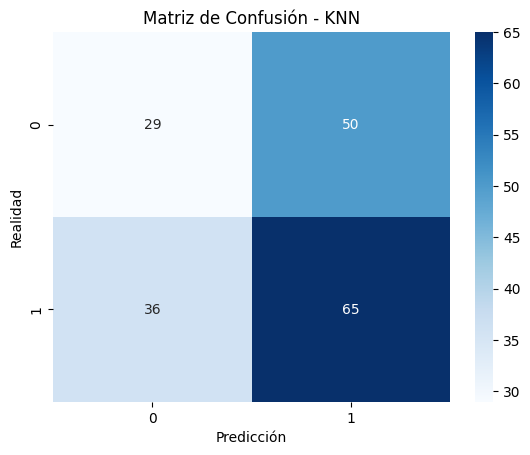

In [45]:

import seaborn as sns


# Codificar variables categóricas
le_genero = LabelEncoder()
df['Genero'] = le_genero.fit_transform(df['Genero'])
df['Producto'] = df['Producto'].astype('category').cat.codes

# Definir características y objetivo
X = df.drop(['ID_Cliente', 'Compra_Futura'], axis=1)
y = df['Compra_Futura']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo 1: KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Función para graficar matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = pd.crosstab(y_true, y_pred, rownames=['Realidad'], colnames=['Predicción'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Realidad')
    plt.xlabel('Predicción')
    plt.show()

# Matriz de Confusión para KNN
plot_confusion_matrix(y_test, y_pred_knn, 'Matriz de Confusión - KNN')



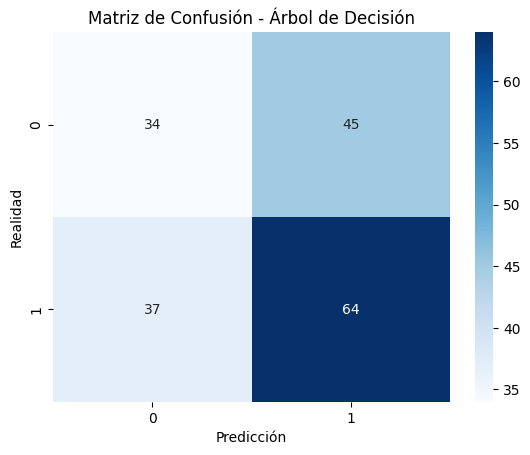

In [46]:
# Modelo 2: Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier

# Modelo de Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Matriz de Confusión para Árbol de Decisión
plot_confusion_matrix(y_test, y_pred_tree, 'Matriz de Confusión - Árbol de Decisión')



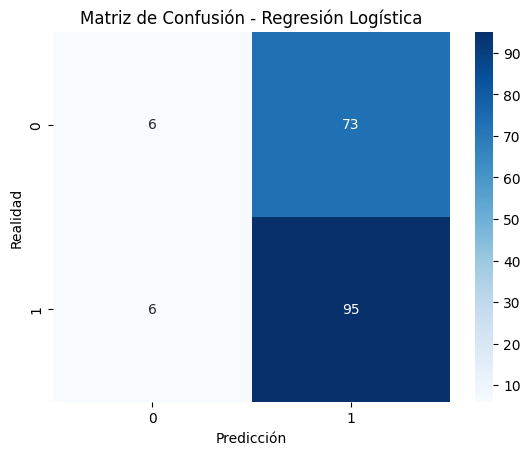

In [47]:
# Modelo 3: Regresión Logística
from sklearn.linear_model import LogisticRegression

# Modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Matriz de Confusión para Regresión Logística
plot_confusion_matrix(y_test, y_pred_log_reg, 'Matriz de Confusión - Regresión Logística')


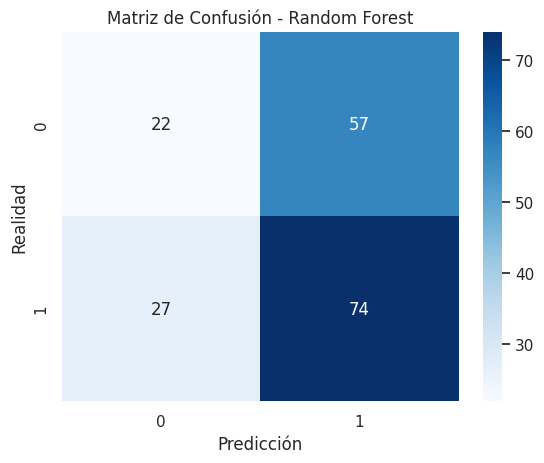

In [51]:
# Importar bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier

# Modelo 4: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Matriz de Confusión para Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Matriz de Confusión - Random Forest')


<ipython-input-53-8dcea7b5c118>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pertinencia', y='Modelo', data=model_evaluation_df, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

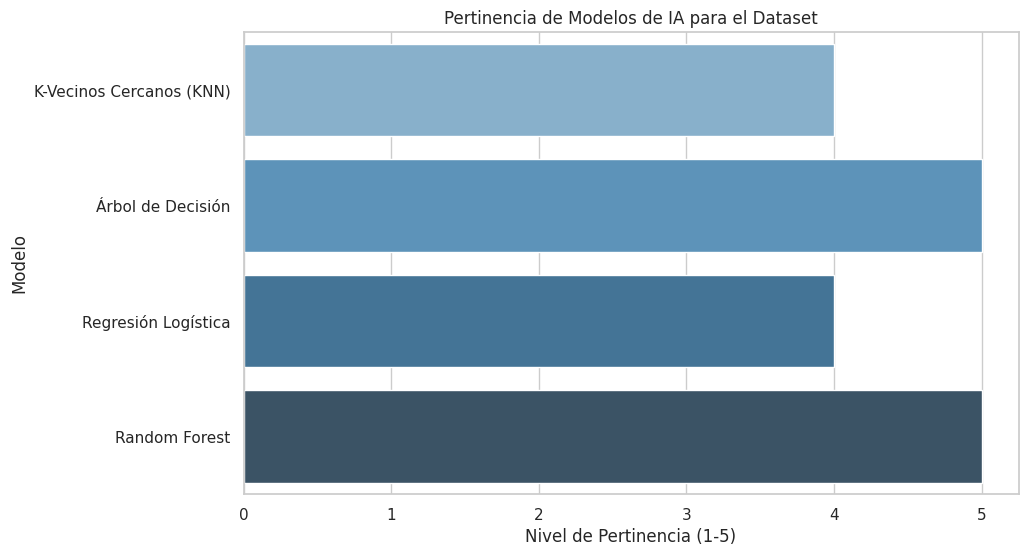

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame para evaluar la pertinencia de los modelos
data = {
    'Modelo': [
        'K-Vecinos Cercanos (KNN)',
        'Árbol de Decisión',
        'Regresión Logística',
        'Random Forest'
    ],
    'Pertinencia': [
        4,  # KNN
        5,  # Árbol de Decisión
        4,  # Regresión Logística
        5   # Random Forest
    ]
}

# Crear el DataFrame
model_evaluation_df = pd.DataFrame(data)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Pertinencia', y='Modelo', data=model_evaluation_df, palette='Blues_d')

# Añadir títulos y etiquetas
plt.title('Pertinencia de Modelos de IA para el Dataset')
plt.xlabel('Nivel de Pertinencia (1-5)')
plt.ylabel('Modelo')

# Mostrar el gráfico
plt.show()



In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Inicializar una lista para almacenar las métricas
metrics_data = []

# Definir una función para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    sensitivity = recall_score(y_true, y_pred, average='binary')  # Sensibilidad
    specificity = recall_score(y_true, y_pred, average='binary', pos_label=0)  # Especificidad
    f1 = f1_score(y_true, y_pred, average='binary')
    return accuracy, precision, sensitivity, specificity, f1

# Calcular métricas para cada modelo
models = ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest']
predictions = [y_pred_knn, y_pred_tree, y_pred_log_reg, y_pred_rf]

for model, y_pred in zip(models, predictions):
    metrics = calculate_metrics(y_test, y_pred)
    metrics_data.append([model] + list(metrics))

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame(metrics_data, columns=['Modelo', 'Exactitud', 'Precisión', 'Sensibilidad', 'Especificidad', 'F1 Score'])

# Mostrar la tabla de métricas
metrics_df



,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNN,0.522222,0.565217,0.643564,0.367089,0.601852
1,Decision Tree,0.544444,0.587156,0.633663,0.430380,0.609524
2,Logistic Regression,0.561111,0.565476,0.940594,0.075949,0.706320
3,Random Forest,0.533333,0.564885,0.732673,0.278481,0.637931


<Figure size 1200x800 with 0 Axes>

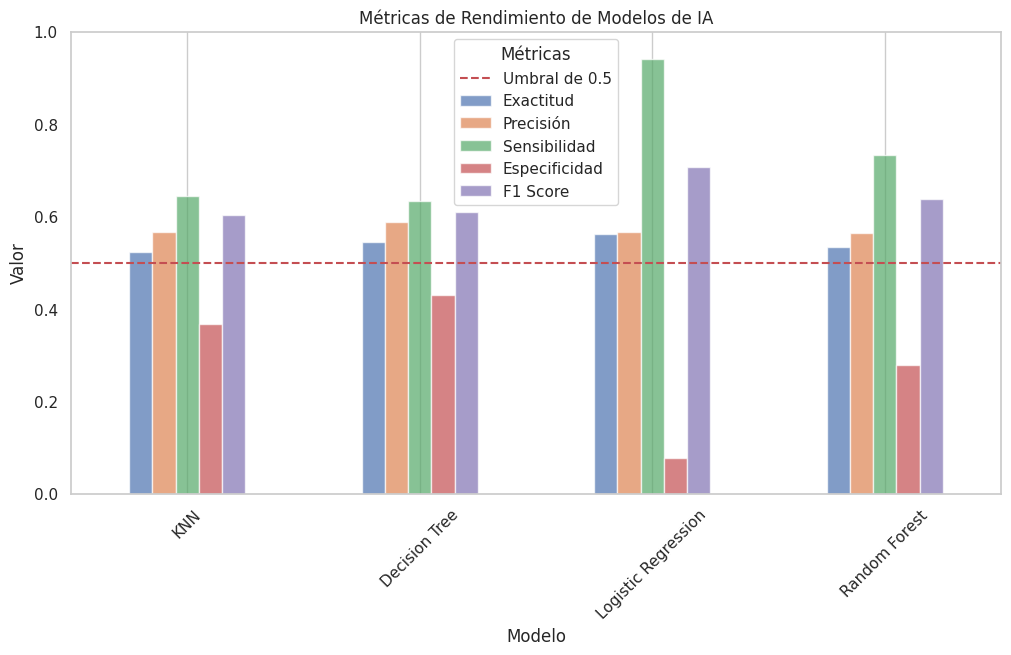

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Gráfico de barras para las métricas
metrics_df.set_index('Modelo').plot(kind='bar', figsize=(12, 6), alpha=0.7)
plt.title('Métricas de Rendimiento de Modelos de IA')
plt.ylabel('Valor')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ajustar el límite del eje Y para métricas de 0 a 1
plt.axhline(0.5, color='r', linestyle='--', label='Umbral de 0.5')
plt.legend(title='Métricas')
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()


<Figure size 1200x800 with 0 Axes>

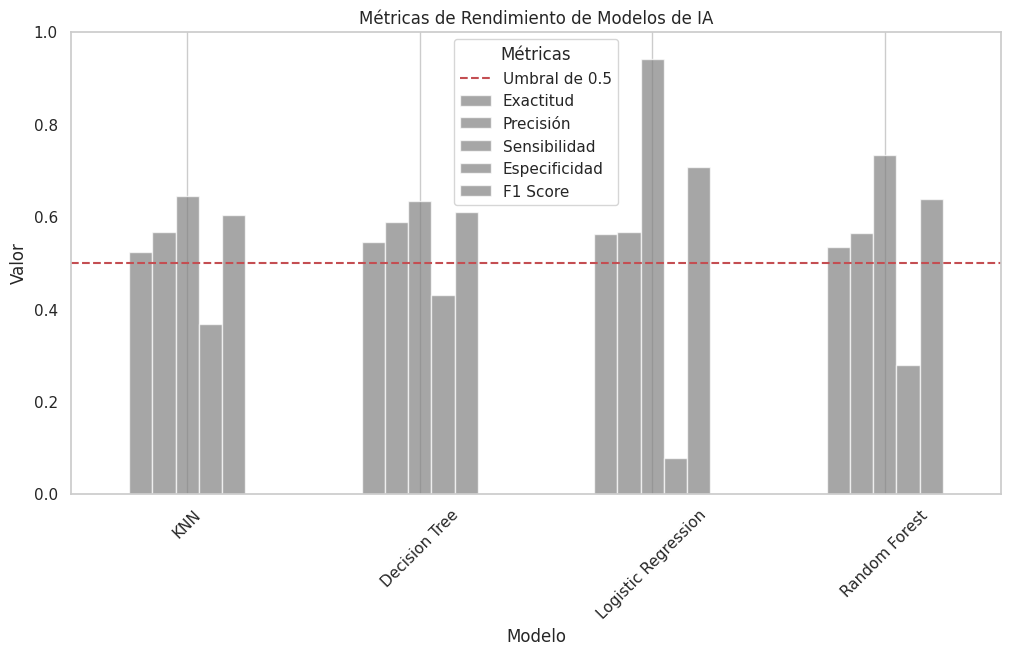

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes el DataFrame metrics_df con las métricas calculadas.

# Colorear el modelo menos pertinente
colors = ['gray' if model != 'Regresión Logística' else 'red' for model in metrics_df['Modelo']]

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Gráfico de barras para las métricas
metrics_df.set_index('Modelo').plot(kind='bar', figsize=(12, 6), alpha=0.7, color=colors)

# Añadir título y etiquetas
plt.title('Métricas de Rendimiento de Modelos de IA')
plt.ylabel('Valor')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ajustar el límite del eje Y para métricas de 0 a 1
plt.axhline(0.5, color='r', linestyle='--', label='Umbral de 0.5')
plt.legend(title='Métricas')
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

